# Time Series Large Gap Filling Tutorial

## Introduction

Welcome to this Jupyter Notebook tutorial on time series Gap Filling for large gaps. In this tutorial, we will walk through the process of gap filling between two time series signals using the toolkit we created.

## Time Series data on Gas Chromatography

Gas chromatography (GC) is an analytical technique used to separate and analyze compounds within a sample. It finds applications across various scientific fields such as chemistry, pharmaceuticals, environmental science, and forensics.

### Principle of Gas Chromatography

Gas chromatography functions by separating a mixture into its individual components based on their distribution between a stationary phase and a mobile phase within a chromatographic column. When the sample is vaporized and injected into the GC system, the components interact differently with the stationary phase, resulting in varied travel rates through the column, hence achieving separation.

### Components of Gas Chromatography

1. **Injector:** This component introduces the sample into the gas chromatograph. It vaporizes the sample and injects it into the carrier gas stream, which carries the sample through the column.

2. **Column:** The column is the core of the gas chromatograph. It consists of a long, coiled tube packed with a stationary phase or coated with it on the inner wall. The interactions between sample components and the stationary phase cause separation.

3. **Carrier Gas:** Typically an inert gas like helium, nitrogen, or hydrogen, the carrier gas transports the sample through the column.

4. **Detector:** The detector identifies and quantifies the separated components as they elute from the column. Common detectors include flame ionization detector (FID), thermal conductivity detector (TCD), electron capture detector (ECD), and mass spectrometer (MS).

Gas chromatography is a powerful tool for analyzing complex mixtures, identifying compounds, and quantifying their presence within a sample, making it an invaluable technique in analytical chemistry and various scientific disciplines.

## Table of Contents

- **[Import Required Libraries and Tool Kit](#1--import-required-libraries-and-tool-kit)**    
- **[Data Loading and Preprocessing](#2--data-loading-and-preprocessing)**

    - **[Instantiate Data Manager and Load data](#21--instantiate-data-manager-and-load-data)**
    - **[Preprocess Data](#22--preprocess-data)**
    - **[Interpolate Nulls](#23--interpolate-nulls)**

- **[Time Series with Gap](#3--time-series-with-gap)**
- **[Gap Filling](#4--gap-filling)**

    - **[Instantiate Gap Filler](#41--instantiate-gap-filler)**
    - **[Fitting Gap Filler](#42--fitting-gap-filler)**
    - **[Predicting the Gap](#43--predicting-the-gap)**
    - **[Get Merged Time Series](#44--get-the-merged-timeseries)**
    - **[Plotting Merged Time Series](#45--plotting-merged-time-series)**


    
## Code Structure

Throughout this notebook, we'll be using Python and the following libraries:

- [pathlib](https://docs.python.org/3/library/pathlib.html) for working with file paths.
- [matplotlib.pyplot](https://matplotlib.org/3.5.3/api/_as_gen/matplotlib.pyplot.html) for plotting.
- [tstoolkit](TS Toolkit Documentation) for time series analysis and modeling.

## Let's Get Started!

We'll begin by importing the necessary libraries and tools and proceed step by step through the time series forecasting process.

## 1- Import Required Libraries and Tool Kit

In [1]:
# Import the Path class for working with file system paths
from pathlib import Path

# Import the DataManager class for data preprocessing
from tstoolkit.data_preprocess import DataManager

# Import the Gap from similarity module for similarity checking
from tstoolkit.gap_filling import TimeSeriesGapFiller

import matplotlib.pyplot as plt

## 2- Data Loading and Preprocessing

In this section, we load and preprocess the time series data.

### 2.1- Instantiate Data Manager and Load Data
- Data Path: The data_path variable contains the file path or URL to the time series data in HDF5 format.
- DataManager: The data_manager object is an instance of a data management class (you should provide more details about this class if necessary) used to handle data loading and preprocessing.
- Load Data: We load the time series data from the specified path.

In [2]:
# Define the path to the time series data file
data_path = Path("../data/example_data.hd5")

# Create an instance of a data manager (DataManager) with the specified data file path
data_manager = DataManager(data_path)

# Load the time series data from the specified data file
data = data_manager.load_data()

### 2.2- Preprocess Data
- The data is preprocessed to reshape the data into a format suitable for the model

In [3]:
# Preprocess the time series data
data = data_manager.preprocess_data(data)

### 2.3- Interpolate Nulls
We fill any nulls in our time series, to prevent errors during training.

- Any missing or NaN values in the data are filled using interpolation techniques and possible methods described in the documentation.

In [4]:
# Fill gaps or missing values in the time series data using linear interpolation
data = data_manager.interpolate_nulls(data, interpolation_method="linear")

# Set DateTime column as index 
data.set_index("DateTime",inplace=True)

# View top 5 rows of the processed data
data.head()

,300468,300498,305256,315036,340686,341124,341550
DateTime,,,,,,,
2020-01-01 00:00:00,65.992325,2036.845581,58.777546,114.388023,1.737929,5.342316,1.386370
2020-01-01 00:00:30,59.085239,2036.812866,67.127098,114.341003,1.691197,5.378604,1.403499
2020-01-01 00:01:00,63.399876,2036.780151,72.960365,114.293983,1.861186,5.308666,1.416289
2020-01-01 00:01:30,74.437500,2036.780334,71.723625,114.207180,1.830390,5.459568,1.512679
2020-01-01 00:02:00,60.391750,2036.780518,70.489014,114.120377,1.729635,5.588947,1.548172


## 3- Time Series with Gap

Since we don't have a Time series with big Gaps, we will create a sample time series with gaps.

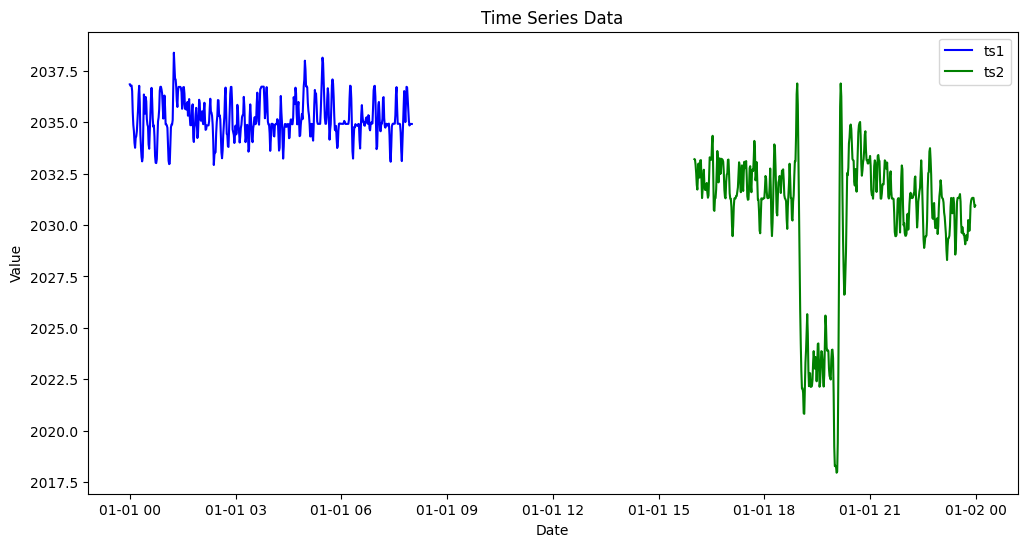

In [5]:
# Calculate the total number of rows
total_rows = len(data)

# Divide the DataFrame into three equal parts
part_size = total_rows // 3

# Get the three equal parts
part1 = data.iloc[:part_size]
part2 = data.iloc[part_size:2 * part_size]
part3 = data.iloc[2 * part_size:]
ts1 = part1['300498'].copy()
ts_ommited = part2['300498'].copy()
ts2 = part3['300498'].copy()

# Define the resampling frequency (1 minute)
resampling_frequency = '1T'

# Resample each DataFrame
ts1 = ts1.resample(resampling_frequency).ffill()  # Forward fill to fill missing values
ts_missing = ts_ommited.resample(resampling_frequency).ffill()
ts2 = ts2.resample(resampling_frequency).ffill()

# Plot the three time series with different colors
plt.figure(figsize=(12, 6))  # Adjust the figure size as needed

# Plot ts2 in blue
plt.plot(ts1.index, ts1.values, label='ts1', color='blue')

# Plot ts_missing in red
#plt.plot(ts_missing.index, ts_missing.values, label='ts_missing', color='red')

# Plot ts3 in green
plt.plot(ts2.index, ts2.values, label='ts2', color='green')

# Set labels and title
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Time Series Data')

# Add a legend
plt.legend()

# Show the plot
plt.show()

## 4- Gap Filling

Now, we will fill large gap in the timeseries.

### 4.1- Instantiate Gap Filler

First, we will create a Gap Filler instance (`filler`)

In [6]:
# Create a Time Series Gap Filler instance and provide it seasonal_periods
filler = TimeSeriesGapFiller(seasonal_periods=100)

### 4.2- Fitting Gap Filler

Then we fit the Gap Filler with both parts of time series before and after the gap

In [7]:
# Fit gap filler with both parts of time series
filler.fit(ts1, ts2)

### 4.3- Predicting the Gap

The fitted gap filler (`filler`) is used to predict the gap in between both parts of timeseries.

In [8]:
# Predict the gap in between both parts of timeseries
filled_series = filler.predict()

### 4.4- Get the Merged Timeseries

Finally, we get the merged timeseries

In [9]:
# Get the merged timeseries
merged_ts = filler.merge_ts()

### 4.5- Plotting Merged Time Series

The complete timeseries is visualized using a plot, generated by the `plot_ts()` method.

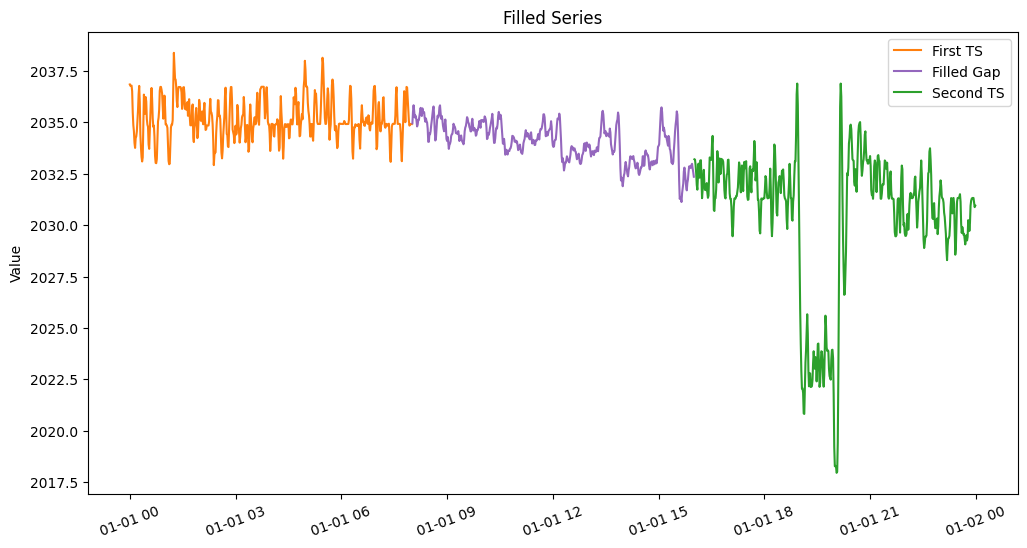

In [10]:
filler.plot_ts()